10.09.2021

Импорт нужных библиотек

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

Загрузка данных

In [2]:
df = pd.read_csv('true_car_listings_prepeared.csv')
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725.0,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,NaN,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851.0,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922.0,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,0,2016,NaN,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852117,63215,2017,9.0,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201.0,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941.0,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005.0,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [3]:
# Метод head(n) предназначен для просмотра первых n строк таблицы (по умолчанию n=5)
# Аналогично метод tail(n) возвращает последние n строк
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725.0,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,NaN,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851.0,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922.0,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,0,2016,NaN,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [4]:
df.tail(5)

,Price,Year,Mileage,City,State,Vin,Make,Model
852117,63215,2017,9.0,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201.0,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941.0,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005.0,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90
852121,76995,2017,2502.0,New York,NY,YV4BC0ZX1H1109845,Volvo,XC90T8


In [5]:
# Если признаков (столбцов) слишком много, полезно будет транспонировать вывод
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Price,8995,10888,8995,10999,0,7989,14490,13995,10495,9995
Year,2014,2013,2013,2014,2016,2012,2014,2013,2013,2013
Mileage,35725.0,NaN,48851.0,39922.0,NaN,NaN,34032.0,32384.0,57596.0,63887.0
City,El Paso,Long Island City,El Paso,Windsor,Lindon,Miami,Greatneck,West Jordan,Waterbury,El Paso
State,TX,NY,TX,CO,UT,FL,NY,UT,CT,TX
Vin,19VDE2E53EE000083,19VDE1F52DE012636,19VDE2E52DE000025,19VDE1F71EE003817,19UDE2F32GA001284,JH4CU2F83CC019895,JH4CU2F84EC002686,JH4CU2F64DC006203,19VDE2E50DE000234,19VDE1F50DE010450
Make,Acura,Acura,Acura,Acura,Acura,Acura,Acura,Acura,Acura,Acura
Model,ILX6-Speed,ILX5-Speed,ILX6-Speed,ILX5-Speed,ILXAutomatic,TSXAutomatic,TSXSpecial,TSX5-Speed,ILX6-Speed,NaN


In [6]:
# Метод info() позволяет вывести общую информацию о датасете
# Мы можем узнать тип каждого признака, а также есть ли в данных пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Price    852122 non-null  int64  
 1   Year     852122 non-null  int64  
 2   Mileage  731179 non-null  float64
 3   City     852122 non-null  object 
 4   State    852122 non-null  object 
 5   Vin      852122 non-null  object 
 6   Make     852122 non-null  object 
 7   Model    775000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 52.0+ MB


In [7]:
df['City'].value_counts()

Houston          12703
San Antonio       8078
Louisville        5872
Jacksonville      5675
Austin            5297
                 ...  
Pleasant Hill        4
Port Jervis          4
Los Banos            4
Pen Argyl            4
Royston              2
Name: City, Length: 2553, dtype: int64

In [8]:
df[df['City'] == "Port Jervis"]

,Price,Year,Mileage,City,State,Vin,Make,Model
140784,10995,2008,84781.0,Port Jervis,NY,1G1ZJ57BX8F287423,Chevrolet,NaN
314575,6995,2006,70876.0,Port Jervis,NY,1FAFP36N36W121465,Ford,Focus4dr
334467,4995,2003,171336.0,Port Jervis,NY,1FTRW08653KA37066,Ford,F-1504WD
340913,10995,1999,156361.0,Port Jervis,NY,1FTNF21L3XEB89376,Ford,Super


In [9]:
# Параметр normalize позволяет узнать процентное соотношение
df['City'].value_counts(normalize=True)

Houston          0.014907
San Antonio      0.009480
Louisville       0.006891
Jacksonville     0.006660
Austin           0.006216
                   ...   
Pleasant Hill    0.000005
Port Jervis      0.000005
Los Banos        0.000005
Pen Argyl        0.000005
Royston          0.000002
Name: City, Length: 2553, dtype: float64

<AxesSubplot:>

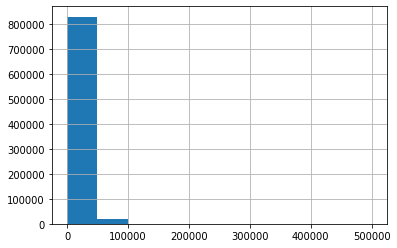

In [10]:
df['Price'].hist()

<AxesSubplot:>

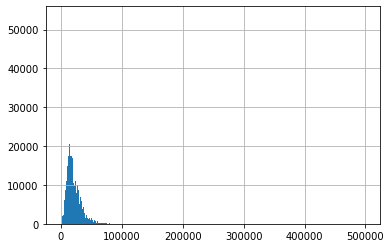

In [11]:
df['Price'].hist(bins=1000)

/Users/nataliiastorozheva/PycharmProjects/AI_Univercity/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

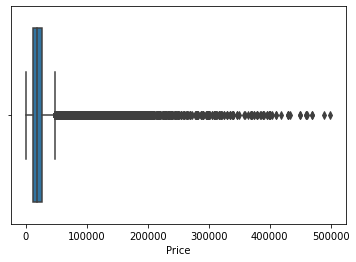

In [12]:
sns.boxplot(df['Price'])

In [13]:
df.groupby('Year')['Price'].mean()

Year
1997     9666.639262
1998     6175.784238
1999     6626.385965
2000     6526.303156
2001     6787.239164
2002     7627.792105
2003     7836.989379
2004     8328.221141
2005     8949.039709
2006     9940.886664
2007    10871.353975
2008    11904.341156
2009    12232.379256
2010    13397.321326
2011    15279.478048
2012    16309.671369
2013    18002.439887
2014    20783.400598
2015    23455.011732
2016    23864.962145
2017    27915.384300
2018    38822.428416
Name: Price, dtype: float64

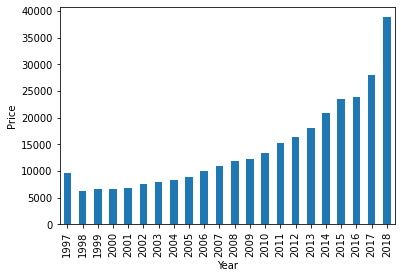

In [14]:
df.groupby('Year')['Price'].mean().plot(kind='bar') 
plt.ylabel('Price') # добавляем подпись на оси Оу
plt.show();

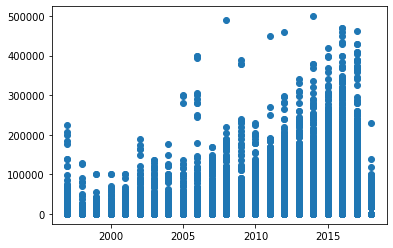

In [15]:
plt.scatter(df.Year, df.Price);

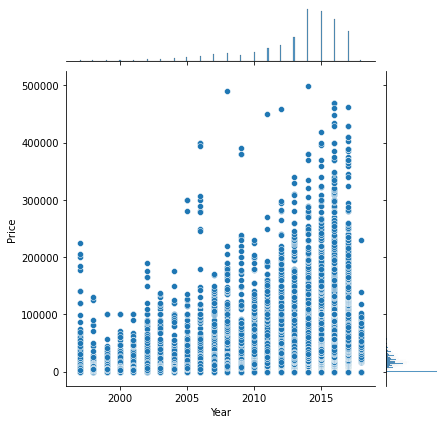

In [16]:
sns.jointplot(x='Year', y='Price', data=df);

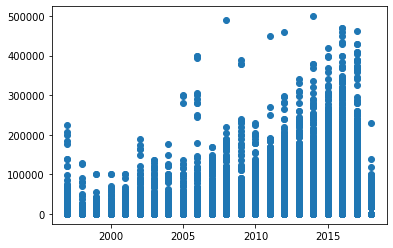

In [17]:
x = df.Year
y = df.Price
plt.scatter(x, y)

Линейная регрессия scipy

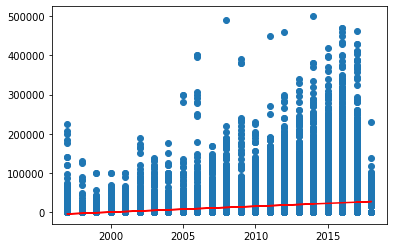

In [18]:
stats = linregress(x, y)

m = stats.slope
b = stats.intercept
plt.scatter(x, y)
plt.plot(x, m * x + b, 'red')
plt.show()

In [19]:
print(m)

1498.9212349544455
